# Regression Using StatsModels
- Run a regression to find beta and alpha of FB to SPY
- FB<sub>t</sub> ~ $\beta$ * SPY<sub>t</sub> + $\alpha$ + e<sub>t</sub>

In [3]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------- -------------------------- 3.1/9.6 MB 18.1 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 20.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/38.4 MB 22.6 MB/s eta 0:00:02
   --------- ------------------------------ 8.7/38.4 MB 20.8 MB/s eta 0:00:02
   ------------- -------------------------- 13.1/38.4 MB 21.4 MB/s eta 0:00:02
   ------------------- -------------------- 18.4/38.4 MB 22.4 MB/s eta 0:00:01
   ------------------------ --------------- 23.6/38.4 MB 23.0 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.4 MB 23.2 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.4 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 23.3 MB/s eta 0:00:01


In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf 

# pip install yfinance
# https://pypi.org/project/yfinance/

In [6]:
# download price data
univ = ['SPY','META']
px = yf.download(univ, start="2016-01-01", auto_adjust=False)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [7]:
px

Ticker,META,SPY
Date,,
2016-01-04,101.662270,171.349350
2016-01-05,102.169502,171.639175
2016-01-06,102.408188,169.474045
2016-01-07,97.385735,165.408142
2016-01-08,96.798958,163.592545
...,...,...
2025-07-21,712.969971,628.770020
2025-07-22,704.809998,628.859985
2025-07-23,713.580017,634.210022


In [8]:
# get returns
ret = px / px.shift() - 1
ret

Ticker,META,SPY
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.004989,0.001691
2016-01-06,0.002336,-0.012614
2016-01-07,-0.049043,-0.023991
2016-01-08,-0.006025,-0.010976
...,...,...
2025-07-21,0.012339,0.001896
2025-07-22,-0.011445,0.000143
2025-07-23,0.012443,0.008508


In [9]:
# set X and Y. Have to add constant
X = ret[['SPY']]
X = sm.add_constant(X)

Y = ret['META']

In [10]:
# observe x,y
print (X)
print (Y)

            const       SPY
Date                       
2016-01-04    1.0       NaN
2016-01-05    1.0  0.001691
2016-01-06    1.0 -0.012614
2016-01-07    1.0 -0.023991
2016-01-08    1.0 -0.010976
...           ...       ...
2025-07-21    1.0  0.001896
2025-07-22    1.0  0.000143
2025-07-23    1.0  0.008508
2025-07-24    1.0  0.000331
2025-07-25    1.0  0.004224

[2404 rows x 2 columns]
Date
2016-01-04         NaN
2016-01-05    0.004989
2016-01-06    0.002336
2016-01-07   -0.049043
2016-01-08   -0.006025
                ...   
2025-07-21    0.012339
2025-07-22   -0.011445
2025-07-23    0.012443
2025-07-24    0.001710
2025-07-25   -0.002966
Name: META, Length: 2404, dtype: float64


In [11]:
# can't do this - missing data
results = sm.OLS(Y, X).fit()

MissingDataError: exog contains inf or nans

In [12]:
# drop data
X = X.dropna()
Y = Y.dropna()
results = sm.OLS(Y, X).fit()

In [13]:
# check summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     1493.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          2.06e-254
Time:                        15:21:06   Log-Likelihood:                 6095.6
No. Observations:                2403   AIC:                        -1.219e+04
Df Residuals:                    2401   BIC:                        -1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.783      0.434      -0.000       0.001
SPY            1.3132      0.034     38.639      0.000       1.247       1.380
==============================================================================
Omnibus:                      844.052   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136918.587
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                      39.965   Cond. No.                         87.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# get params
results.params

const    0.000306
SPY      1.313178
dtype: float64

## SPY is B coefficient = 1.313 and const is Alph = 0.0003

In [15]:
# get tvalues
results.tvalues

const     0.782518
SPY      38.639023
dtype: float64

## .tvalues tells you how statistically significant it is and SPY/beta is highly significant. Anything over a 2 or under -2 is significant. 

Reconstruct FB
- FB<sub>t</sub> ~ $\beta$ * SPY<sub>t</sub> + $\alpha$ + e<sub>t</sub>

### X is return on SPY and Y is return on META

In [16]:
FB = results.params['SPY']*X['SPY'] + results.params['const'] + results.resid 

In [17]:
# basically identical
(FB-Y).abs().sum()

np.float64(1.3536264123481523e-16)

In [18]:
beta_contr = results.params['SPY']*X['SPY']
prediction = results.params['SPY']*X['SPY'] + results.params['const']
alpha_contr = results.params['const'] + results.resid

In [19]:
alpha_contr

Date
2016-01-05    0.002768
2016-01-06    0.018901
2016-01-07   -0.017539
2016-01-08    0.008389
2016-01-11    0.000550
                ...   
2025-07-21    0.009849
2025-07-22   -0.011633
2025-07-23    0.001271
2025-07-24    0.001275
2025-07-25   -0.008513
Length: 2403, dtype: float64

<Axes: xlabel='Date'>

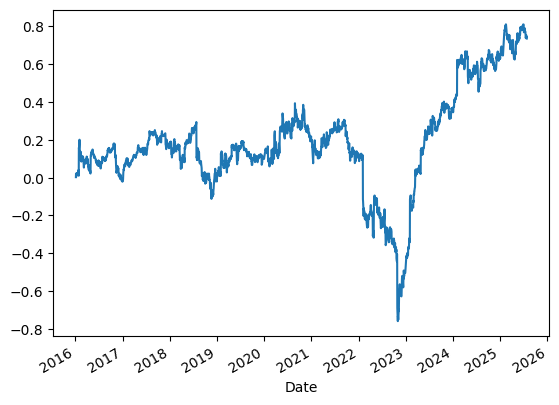

In [20]:
alpha_contr.cumsum().plot()

In [21]:
# correl is zero to spy
alpha_contr.corr(X['SPY'])

np.float64(5.656660935261237e-17)

In [22]:
# "alpha"
alpha_contr.mean()

np.float64(0.0003062063190006553)

In [23]:
# information ratio
alpha_contr.mean()/alpha_contr.std()*np.sqrt(252)

np.float64(0.2538192217694982)

In [24]:
# alpha t-stat
results.tvalues['const']

np.float64(0.7825182214363358)